In [130]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from random import randint
import scipy.stats as ss
#from scipy.stats import norm, kurtosis, skew

# Understanding Z-scores

In [2]:
df = pd.DataFrame({'Class_1_Scores': [85,95,75,80,90], 'Class_2_Scores': [88,79,91,85,82]})
df.append(df.apply(np.mean,axis=0),ignore_index= True)

,Class_1_Scores,Class_2_Scores
0,85.0,88.0
1,95.0,79.0
2,75.0,91.0
3,80.0,85.0
4,90.0,82.0
5,85.0,85.0


Z-Score and Standard Deviation
- How far is any given data point from the mean
- How many standard deviations away from the mean is the data point
- The standard deviation is a measuring unit, standardized measures
- Z-scores ignores measurement units
Since a z-score is a measure of Distance from the mean:
- We set the mean to "Zero" like a starting point and measure the distance from the mean by the number of standard deviations away
Example: mean = 50, standard dev = 5. A value of 55 would have a z-score of 1.0 because it is 1 standard deviation from the mean

$ Z = \frac{data point - mean}{Standard Devialtion} $

\begin{equation}
z = \frac{x-\mu}{\sigma}
\end{equation}

In [3]:
class1 = pd.DataFrame({'Scores': [85,95,75,80,90]})
means = class1['Scores'].mean()
class1['Mean'] = [means, means, means, means, means]
class1['Score - Mean'] = class1['Scores'].apply(lambda x: x - means)
class1['Z Score'] = class1['Scores'].apply(lambda x: (x - means)/class1['Scores'].std())
print("STD = " + str(class1['Scores'].std()))
class1

STD = 7.905694150420948


,Scores,Mean,Score - Mean,Z Score
0,85,85.0,0.0,0.000000
1,95,85.0,10.0,1.264911
2,75,85.0,-10.0,-1.264911
3,80,85.0,-5.0,-0.632456
4,90,85.0,5.0,0.632456


In [4]:
class1['(Score - Mean)^2'] = class1['Score - Mean'].apply(lambda x: x**2)
print("Variance = (0+100+100+25+25)/4 = " + str(class1['Scores'].var()))
class1

Variance = (0+100+100+25+25)/4 = 62.5


,Scores,Mean,Score - Mean,Z Score,(Score - Mean)^2
0,85,85.0,0.0,0.000000,0.0
1,95,85.0,10.0,1.264911,100.0
2,75,85.0,-10.0,-1.264911,100.0
3,80,85.0,-5.0,-0.632456,25.0
4,90,85.0,5.0,0.632456,25.0


$ CoefficientofVariance = \frac{StandardDevialtion}{Mean} X 100$
- The Coefficient of Variance is a relative measure of variability
- expresse as a percentage
- measures the standard deviation relative to the mean
- unit independent

In [5]:
class1_mean = class1['Scores'].mean()
class1_std = class1['Scores'].std()
print('The Coefficient of Variance of class 1 = ' + str((class1_std/class1_mean)*100) + '%') 

The Coefficient of Variance of class 1 = 9.300816647554058%


# Is my Data Normally Distributed?

Normal Distribution


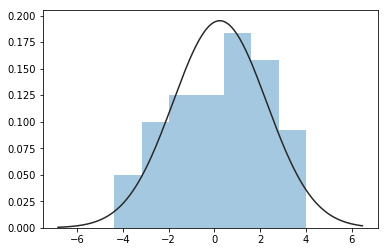

In [164]:
print('Normal Distribution')
mu = 0
sigma = 2
x_normal = np.random.normal(mu, sigma, size=100)
sns.distplot(x_normal, fit=norm, kde=False);

Excess Kurtosis
More Probability than expected in the tails of the distribution due to extreme values away from the mean


(0, 1.5)

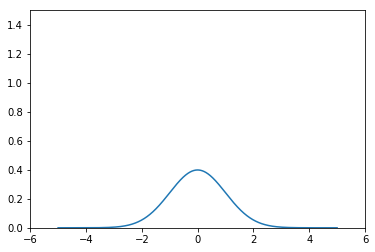

In [162]:
print('Excess Kurtosis\nMore Probability than expected in the tails of the distribution due to extreme values away from the mean')
#x = np.concatenate((np.linspace(-10, -8, 5000),np.linspace(-8, 8, 50000),np.linspace(8, 10, 5000),))
x = np.linspace(-5, 5, 5000)
mu=0
sigma=1
y = norm.pdf(x, mu, sigma)
plt.plot(x,y)
plt.xlim(-6,6)
plt.ylim(0,1.5)

Excess Skewness
More Probability than expected on one side of distribution


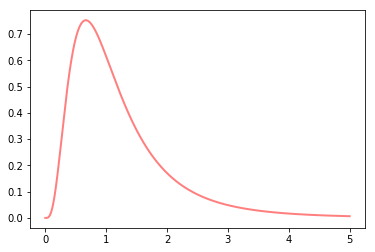

In [165]:
print('Excess Skewness\nMore Probability than expected on one side of distribution')
x = np.linspace(0.001, 5, 5000)
y = ss.f.pdf(x, 10, 10, 0, 1)
plt.plot(x, y, color='red', lw=2, ls='-', alpha=0.5, label='pdf')

## Box Plot

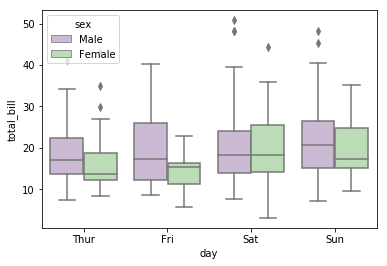

In [166]:
tips = sns.load_dataset("tips")

# Draw a nested boxplot to show bills by day and sex
sns.boxplot(x="day", y="total_bill", hue="sex", data=tips, palette="PRGn")